<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [77]:
# Insert your code here

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path
from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [78]:
# Insert your code here

# Try to load each file from ../data/ first, else from current folder.
price_path = "../data/asset_price_data.csv"
info_path = "../data/asset_information_data.csv"
weights_path = "../data/portfolio_weights.csv"

if not os.path.exists(price_path):
    price_path = "asset_price_data.csv"
if not os.path.exists(info_path):
    info_path = "asset_information_data.csv"
if not os.path.exists(weights_path):
    weights_path = "portfolio_weights.csv"

have_prices = os.path.exists(price_path)
have_info = os.path.exists(info_path)
have_weights = os.path.exists(weights_path)

if have_prices:
    df_prices = pd.read_csv(price_path)
    print("Loaded price data:", df_prices.shape)
else:
    print("⚠️ Missing price file:", price_path)

if have_info:
    df_info = pd.read_csv(info_path)
    print("Loaded info data:", df_info.shape)
else:
    print("⚠️ Missing info file:", info_path)

if have_weights:
    df_w = pd.read_csv(weights_path)
    print("Loaded weights data:", df_w.shape)
else:
    print("⚠️ Missing weights file:", weights_path)

Loaded price data: (783, 6)
Loaded info data: (5, 2)
Loaded weights data: (783, 6)


In [79]:
# Show the sample rows of each dataset if available
if 'df_prices' in globals():
    display(df_prices.sample(5))
if 'df_info' in globals():
    display(df_info.sample(5))
if 'df_w' in globals():
    display(df_w.sample(5))

,date,Asset1,Asset2,Asset3,Asset4,Asset5
437,2020-09-04,253.0100,73.755,28.982524,326.32,46.915
387,2020-06-26,250.9475,66.327,29.105799,315.47,42.835
424,2020-08-18,253.2985,74.005,29.391346,324.32,47.330
99,2019-05-21,237.0506,63.555,29.595533,317.44,53.470
481,2020-11-05,258.2050,76.766,28.807315,326.44,47.675


,Name,Family
4,Asset5,Alternative
2,Asset3,Equity
0,Asset1,Fixed Income
1,Asset2,Fixed Income
3,Asset4,Equity


,date,Asset1,Asset2,Asset3,Asset4,Asset5
277,2020-01-24,0.321749,0.127529,0.123941,0.185697,0.241084
101,2019-05-23,0.225458,0.116255,0.265003,0.230310,0.162974
164,2019-08-20,0.225458,0.116255,0.265003,0.230310,0.162974
176,2019-09-05,0.225458,0.116255,0.265003,0.230310,0.162974
688,2021-08-23,0.071307,0.266093,0.168775,0.335470,0.158356


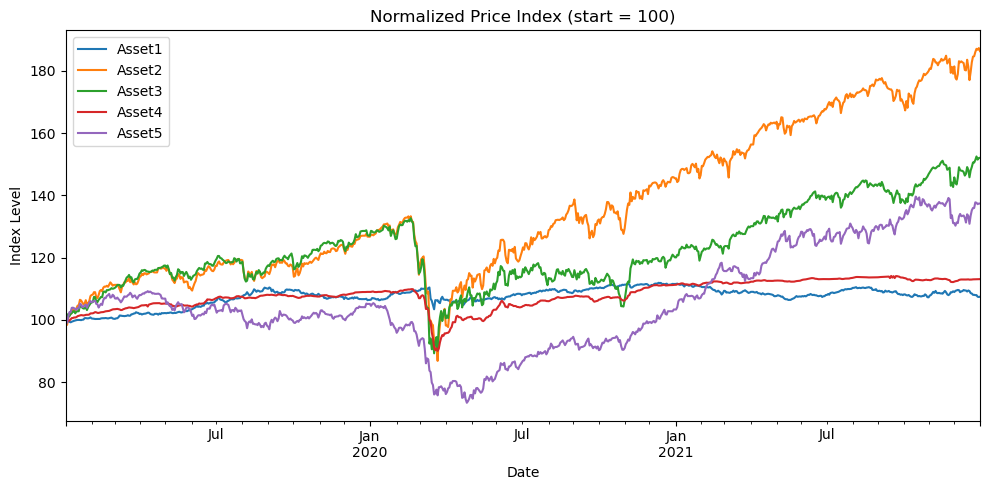

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2019-01-04,230.4026,56.129,26.147133,301.77,51.38
2019-01-07,230.0543,56.838,25.955277,302.33,52.14
2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [80]:
# 1) Find date column and set index
date_col = None
for candidate in ['Date', 'date', 'DATE']:
    if candidate in df_prices.columns:
        date_col = candidate
        break
if date_col is None:
    date_col = df_prices.columns[0]

df_prices[date_col] = pd.to_datetime(df_prices[date_col], errors='coerce')
df_prices = df_prices.dropna(subset=[date_col])
df_prices = df_prices.set_index(date_col).sort_index()

# 2) Forward-fill missing values (if any)
df_prices = df_prices.ffill()

# 3) Normalize prices so they start at the same level (100)
first_values = df_prices.iloc[0]
df_norm = (df_prices / first_values) * 100

# 4) Plot normalized prices
plt.figure(figsize=(10, 5))
df_norm.plot(ax=plt.gca(), legend=True)
plt.title('Normalized Price Index (start = 100)')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.tight_layout()
plt.show()

display(df_prices.head())

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [89]:
# Insert your code here

# a) Daily percentage returns
df_returns = df_prices.pct_change().dropna()

df_returns

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
2019-01-09,0.001976,0.012919,0.002272,0.004120,0.014003
...,...,...,...,...,...
2021-12-27,-0.000913,0.007384,0.005439,0.000000,0.013443
2021-12-28,0.000064,0.005483,0.007599,0.000000,-0.001141
2021-12-29,-0.004862,-0.001588,-0.006647,0.000175,-0.003142


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [82]:
# Insert your code here

# b) Correlation matrix
corr_matrix = df_returns.corr()
display(corr_matrix)

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.088341,-0.061253,0.102252,-0.106484
Asset2,-0.088341,1.000000,0.852491,0.526634,0.591399
Asset3,-0.061253,0.852491,1.000000,0.511550,0.557414
Asset4,0.102252,0.526634,0.511550,1.000000,0.421155
Asset5,-0.106484,0.591399,0.557414,0.421155,1.000000


<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

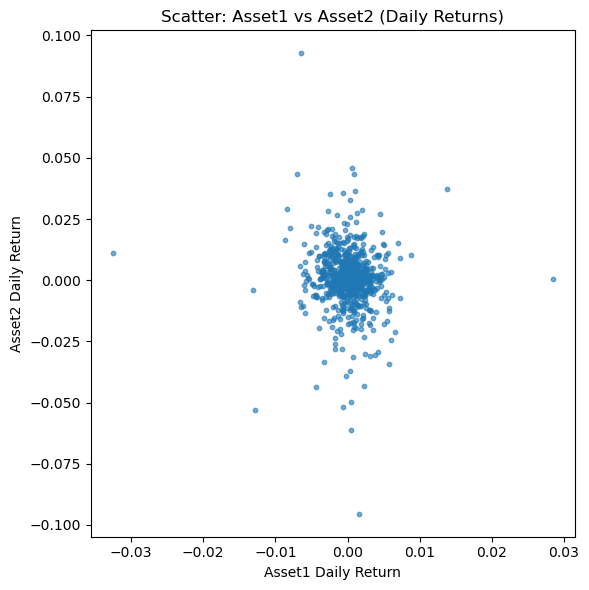

In [83]:
# Insert your code here

# c) Scatter plot for the first two assets (for simplicity)
asset_cols = list(df_returns.columns)
if len(asset_cols) >= 2:
    asset_x = asset_cols[0]
    asset_y = asset_cols[1]

    plt.figure(figsize=(6, 6))
    plt.scatter(df_returns[asset_x], df_returns[asset_y], s=10, alpha=0.6)
    plt.title(f'Scatter: {asset_x} vs {asset_y} (Daily Returns)')
    plt.xlabel(f'{asset_x} Daily Return')
    plt.ylabel(f'{asset_y} Daily Return')
    plt.tight_layout()
    plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

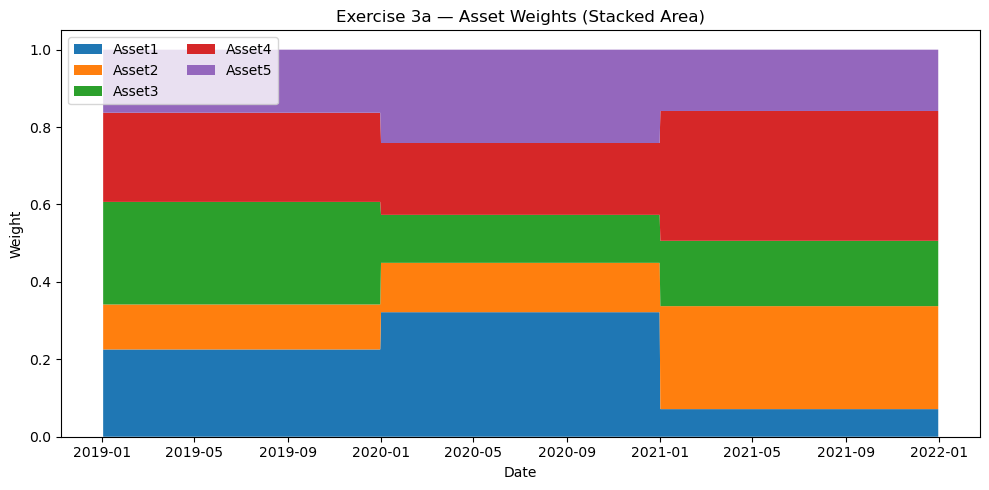

In [ ]:
# Insert your code here

if 'df_prices' not in globals():
    print("Prices not loaded. Please run Exercise 1 first (after adding 'asset_price_data.csv').")
else:
    # Detect date column
    w_date_col = None
    for candidate in ['Date', 'date', 'DATE']:
        if candidate in df_w.columns:
            w_date_col = candidate
            break
    if w_date_col is None:
        w_date_col = df_w.columns[0]

    df_w[w_date_col] = pd.to_datetime(df_w[w_date_col], errors='coerce')
    df_w = df_w.dropna(subset=[w_date_col])
    df_w = df_w.set_index(w_date_col).sort_index()

    # (a) Area chart (stacked) of asset weights
    dates_w = df_w.index
    weights_values = df_w.values.T  # for stackplot
    plt.figure(figsize=(10, 5))
    plt.stackplot(dates_w, *weights_values, labels=list(df_w.columns))
    plt.legend(loc='upper left', ncol=2)
    plt.title('Exercise 3a — Asset Weights (Stacked Area)')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.tight_layout()
    plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

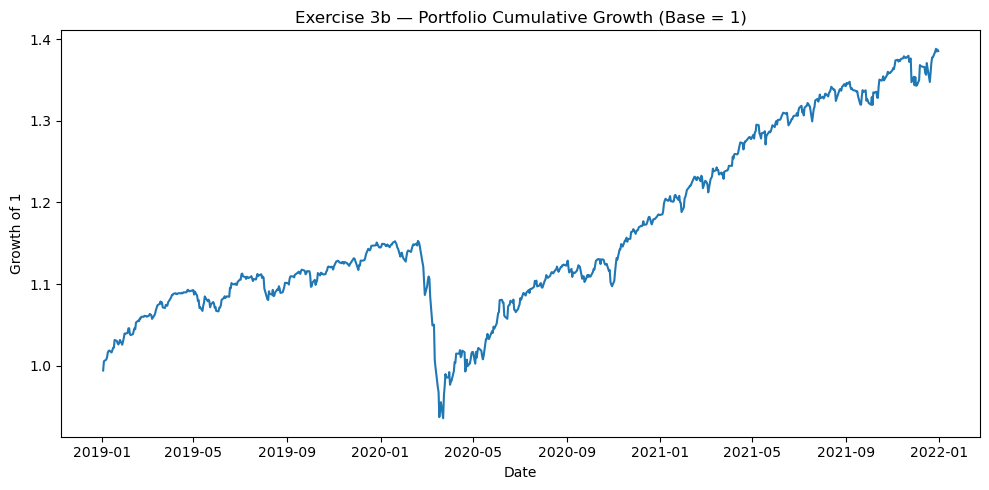

In [85]:
# Insert your code here

# Align returns and weights on common dates and common assets
df_returns = df_prices.pct_change().dropna()
common_dates = df_returns.index.intersection(df_w.index)
df_returns_aligned = df_returns.loc[common_dates, :]
df_w_aligned = df_w.loc[common_dates, :]

common_assets = [c for c in df_returns_aligned.columns if c in df_w_aligned.columns]
if len(common_assets) == 0:
    print("No matching asset names between returns and weights columns. Please ensure column names match.")
else:
    df_returns_aligned = df_returns_aligned[common_assets]
    df_w_aligned = df_w_aligned[common_assets]

    # (b) Portfolio cumulative growth of 1
    port_daily_ret = (df_w_aligned * df_returns_aligned).sum(axis=1)
    port_cum = (1 + port_daily_ret).cumprod()

    plt.figure(figsize=(10, 5))
    plt.plot(port_cum.index, port_cum.values)
    plt.title('Exercise 3b — Portfolio Cumulative Growth (Base = 1)')
    plt.xlabel('Date')
    plt.ylabel('Growth of 1')
    plt.tight_layout()
    plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [86]:
# Insert your code here

# (c) Annualized return (geometric), (d) Annualized volatility
n_days = port_daily_ret.shape[0]
ann_factor = 261
total_growth_factor = (1 + port_daily_ret).prod()
ann_return = total_growth_factor ** (ann_factor / n_days) - 1
ann_vol = port_daily_ret.std() * np.sqrt(ann_factor)

print('Annualized Return:', round(float(ann_return), 6))
print('Annualized Volatility:', round(float(ann_vol), 6))

Annualized Return: 0.115026
Annualized Volatility: 0.085126


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [87]:
# Insert your code here

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

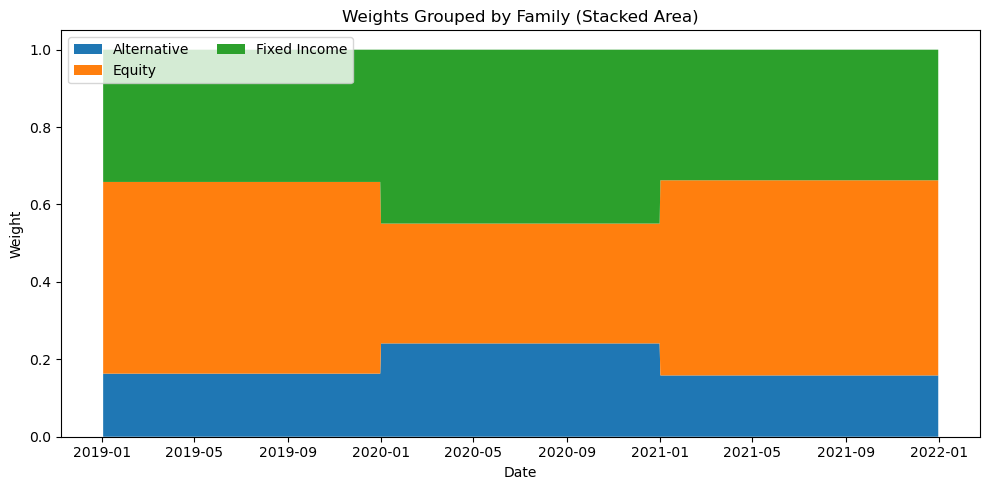

In [88]:
# Insert your code here

asset_name_col = None
family_col = None
for c in df_info.columns:
    if c.lower() in ['asset', 'ticker', 'symbol', 'name']:
        asset_name_col = c
    if c.lower() in ['family', 'category', 'group', 'class']:
        family_col = c

if (asset_name_col is not None) and (family_col is not None):
    mapping = dict(zip(df_info[asset_name_col], df_info[family_col]))
    mapping = {k: v for k, v in mapping.items() if k in df_w.columns}
    if len(mapping) == 0:
        print("No asset names in info file match the weight columns — skipping 3e.")
    else:
        known_assets = list(mapping.keys())
        df_w_known = df_w[known_assets].copy()

        families = sorted(set(mapping.values()))
        df_w_family = pd.DataFrame(index=df_w_known.index)

        for fam in families:
            fam_assets = [a for a, fam_name in mapping.items() if fam_name == fam]
            df_w_family[fam] = df_w_known[fam_assets].sum(axis=1)

        plt.figure(figsize=(10, 5))
        plt.stackplot(df_w_family.index, *df_w_family.values.T, labels=list(df_w_family.columns))
        plt.legend(loc='upper left', ncol=2)
        plt.title('Weights Grouped by Family (Stacked Area)')
        plt.xlabel('Date')
        plt.ylabel('Weight')
        plt.tight_layout()
        plt.show()
else:
    print("Could not detect 'asset' and 'family/category' columns in asset_information_data.csv — skipping 3e.")
